# Computational Methods in Economics

## Lecture 4 - Root Finding

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-11-05 18:56:47.660214


## Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import scipy.optimize

# import sys
from importlib import reload

## This Lecture

- [Introduction](#introduction)
- [Bisection](#bisection)
- [Function Iteration](#funiter)
- [Newton's Method](#newton)
- [Numerical Differentiation](#numdiff)
- [Quasi-Newton Methods](#quasi)
- [The Scipy Package](#scipy)

## Introduction

<a id = "introduction"></a>

A function $f(x)$ has a *root* (also called a *zero*) at $x^*$ if $f(x^*) = 0$. Note that $f$ here can be a univariate function (both input and output are scalars, or both its range and its domain have a dimension of 1), a multivariate function (its inputs are vectors, hence its domain has a dimension greater than 1) or vector-valued (both its range and its domain have a dimension greater than 1. In the latter case, finding the roots of a vector-valued function is equivalent to *solving a system of nonlinear equations*. 

Finding the root(s) of a function is one of the most common computational problems in economics, often applied when looking for an equilibrium. In other words, an equilibrium is usually defined by a set of equations


### Example: Neoclassical Growth Model


- Utility function:

\begin{equation}
    u(c, h) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h^{1+\eta}}{1+\eta}
\end{equation}

with $c$ denoting consumption and $h$ labor supply.

- Production function:

\begin{equation}
    f(k, h) = A k^\alpha h^{1-\alpha}
\end{equation}
with $k$ denoting the capital stock, and $\theta$ a productivity shock.

- Resource Constraint:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t
\end{equation}

- Planner's Problem:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}
s.t. the resource constraint.

- F.o.c's:
(1) Euler equation

\begin{equation}
    c^{-\nu} = \beta \left[ (c')^{-\nu} (f_k(k', h') + 1 - \delta) \right]    
\end{equation}

(2) intratemporal optimality condition

\begin{equation}
    B h^{\eta} = c^{-\nu} f_h(k, h)  
\end{equation}

where I have used the notation $c = c_t$ and $c' = c_{t+1}$ for brevity. 

In an equilibrium, the two first-order conditions, combined with the resource constraint, must hold in every period. We will get to how to solve for the full dynamic allocation later in this course. For now, let's consider the *steady state*, where all variables are constant over time, i.e. $c_t = c_{t+1} = c_s$ and so on. The Euler equation then can be simplied to:

\begin{equation}
    1 = \beta \left[f_k(k_s, h_s) + 1 - \delta \right]    
\end{equation}

For the intratemporal optimality condition, use the resource constraint to substitute consumption:

\begin{equation}
    B h_s^{\eta} = \left[ f(k_s, h_s) - \delta k_s \right]^{-\nu} f_h(k_s, h_s)  
\end{equation}

This is a nonlinear system of two equations, with two unknown variables, $k_s$ and $h_s$, which can be solved using the method introduced below. We can also define a vector-valued function $\mathbf{S}$ with

\begin{equation}
   \mathbf{S}(k, h) = 
    \left[
    \begin{array}{c}
        \beta \left[f_k(k, h) + 1 - \delta \right]  - 1 \\
        \left[ f(k, h) - \delta k \right]^{-\nu} f_h(k, h) - B h^{\eta}
    \end{array}
    \right]
\end{equation}

Finding the steady state of the model then requires finding a root of function $\mathbf{S}$, i.e. a vector $(k_s, h_s)$ such that 

\begin{equation}
   \mathbf{S}(k_s, h_s) = 
    \left[
    \begin{array}{c}
        0 \\
        0
    \end{array}
    \right]
\end{equation}

--------------------------------------------------------------------------------------------------------------------------------

## Bisection

<a id = 'bisection'></a>

The simplest way to compute the root of a continuous univariate real-valued function is the *bisection method*. While simple, bisection captures two important features of most root-finding and optimization methods: it is a *local* method and it is based on an *iterative procedure*.

The key idea behind the bisection method is based on the *Intermediate Value Theorem*: if $f$ is continuous and defined on the interval $[a,b]$, and if $f(a)$ and $f(b)$ are distinct values, then $f$ must assume all values in between. Since we are interested in where $f$ assumes the value 0, we need $f(a)$ and $f(b)$ to have different signs.

The bisection method implements the following "pseudo-code":

(i) Start with two values $a$ and $b$ such that $f(a)$ and $f(b)$ are defined and have different signs. Moreover, specify a "tolerance level" $tol$ which should be a very small number, e.g. 1e-8.

(ii) Compute the midpoint between $a$ and $b$, $x = \frac{a + b}{2}$. 

(iii) If $f(x)$ has the same sign as $f(a)$, replace the left endpoint of the interval with $x$, i.e. $a = x$.

(iv) If $f(x)$ has the same sign as $f(b)$, replace the right endpoint of the interval with $x$, i.e. $b = x$.

(v) Repeat from (ii) until the absolute value of $f(x)$ is less than $tol$, i.e. $|f(x)| < tol$.

Note the following:
- Bisection is an *iterative procedure*: at the beginning of each iteration step, the interval $[a,b]$ contains a root of $f$. The interval is then divided ("bisected") into two subintervals of equal length. One of the two subintervals must contain the root, and hence have endpoints of different signs. This subinterval is taken as the interval $[a,b]$ used for the next iteration. This process continues until the resulting midpoint $x$ of the current interval is sufficiently close to 0.  
- Moreover, bisection is a *local* method: it will not give you all the roots of a function, but only one of the roots (in case there are multiple roots) between $a$ and $b$. A corollary of this is that the outcome of bisection (and of local methods in general) is sensitive to the starting point chosen by the user, here the values for $a$ and $b$.

The bisection method is robust in the sense that it will find a root in a known number of iterations, assuming the initial choices for $a$ and $b$ lead to different signs for $f(a)$ and $f(b)$. The obvious downside of bisection is that it only works for univariate functions. Moreover, it is usually slower than the other methods discussed below. 

In this week's problem set, you will be asked to code up the bisection method. Of course, most programming languages already have in-built implementations (e.g. in SciPy: **scipy.optimize.bisect**, as discussed below), so writing your own function may seem a bit redundant, but will help you to get used the inner workings of many of the algorithms used in scientific computing.

--------------------------------------------------------------------------------------------------------------------------------

## Function Iteration
<a id = 'funiter'></a>


We have started to talk about iterative methods at the end of last lecture. To recap, the basic idea of iterative methods is to generate a sequence of approximations to the object of interest, e.g. the solution to linear or nonlinear system of equations, following an iteration rule: 

\begin{equation}
    x^{(k+1)} = g( x^{(k)} ),
\end{equation}

where $k$ is an indicator counting the number of iterations. Hence, in words, the value for $x$ in the $k+1$-iteration is obtained by applying function $g$ on the value for $x$ in the $k$-iteration. Ideally, these approximations become more and more precise with an increasing number of iterations. Recall that iterative methods, in contrast to direct methods, do not yield an exact solution.


When finding the root of a function $f$ or solving for a system of nonlinear equations, the functional form of $g$ is simply

\begin{equation}
    g( x ) = x - f(x).
\end{equation}

This is intuitive: at the root $ x = x* $, we have $f(x^*) = 0$ and hence $g (x^*) = x^*$. In other words, $x^*$ is a *fixed point*.

The following piece of code implements function iteration. As a simple workhorse example, consider the function

\begin{equation}
    f(x) = 4 \ln(x) - 4,
\end{equation}

which has a root at $x = e^x = 2.718282$. For illustration, we print the current guess for $x^{(k)}$ for each iteration. As we can see,  $x^{(k)}$ converges to $x^*$ as the number of iterations increases.

In [3]:
def fun(x):
    return 4*np.log(x) - 4

def g(x):
    return x - fun(x)

In [4]:
tol = 1e-8
x = 4
it = 0
lst = []
while abs((x - g(x))) > tol:
    it += 1
    x = g(x)
    lst.append(x)
    print(x)
    

print("Number of iterations = {}".format(it) )

2.45482255552
2.86260463623
2.65567694682
2.74887857583
2.70410642422
2.72502036232
2.71511676033
2.7197769279
2.71757746733
2.71861408156
2.7181251951
2.71835569051
2.71824700267
2.71829824977
2.71827408559
2.71828547937
2.71828010699
2.71828264016
2.71828144573
2.71828200892
2.71828174337
2.71828186858
2.71828180954
2.71828183738
2.71828182425
Number of iterations = 25


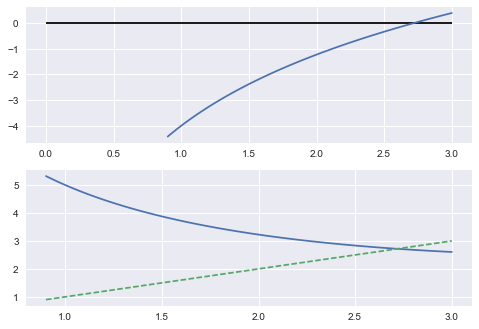

In [5]:
x = np.linspace(0.9, 3, 100)
fig, ax = plt.subplots(2,1)
# ax[0].ylabel($$f(x)$$)
ax[0].plot(x, fun(x))
ax[0].hlines(0, 0, 3)
ax[1].plot(x, g(x))
ax[1].plot(x, x, '--')

--------------------------------------------------------------------------------------------------------------------------------

## Newton's Method
<a id = 'newton'></a>


Most algorithms used in practice to find the roots of a nonlinear system of equations are based on Newton's method. As function iteration, it is an iterative method. However, it uses additional information, namely about the derivatives of $f$.

#### Univariate Function

Let us start with the case of a univariate function $f$. Recall that we want to find a root $x^*$ of the function $f$, i.e. where $f(x^*) = 0$. Start with an initial guess for $x^*$, denoted by $x_0$. We can approximate $f$ with a first-order Taylor approximation around $x_0$:

\begin{equation}
    f(x) \approx f(x_0) + (x - x_0) f'(x_0)
\end{equation}

Setting $f(x) = 0$ - our target value - and solving this expression for $x$ gives us the "best guess" for $x^*$ given the initial guess and the properties of the function (i.e. its value and derivative) at $x_0$:
\begin{equation}
 x_1 \approx x_0 - \frac{f(x_0)}{f'(x_0)}
\end{equation}

Iterating on this step, we can again generate a sequence $x_1, x_2, ..., x_n$; hence the iteration rule is given by:

\begin{equation}
 x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}
\end{equation}

In other words, the functional form of $g$ is now
\begin{equation}
    g( x ) = x - \frac{f(x)}{f'(x)}.
\end{equation}

Comparing to simple function iteration above, we have one additional term, the derivative of $f$ at $x^{(k)}$. Hence, we use more information on the properties of the function than above. More precisely, we put a weight on the distance between the old guess $x^{(k)}$ and the new guess $x^{(k+1)}$. With function iteration, the distance was given by $f(x^{(k)})$, while in Newton's method, it is $f(x^{(k)})/f'(x^{(k)})$. It is intuitive why this is an improvement:
- if the absolute value of $f'(x^{(k)})$ is small, this means the function is relatively flat; in this case, it is likely that the current guess $x^{(k)}$ is still far from the root, and hence the jump to the next guess should be large
- if the absolute value of $f'(x^{(k)})$ is large, the function is relatively steep, making it more likely that we are close to  the root; hence the jump to the next guess should be small



The following code implements Newton's method. As before, the current guess for $x$ is printed in every iteration. Unsurprisingly given the intuition above, Newton's method needs considerably fewer iterations than simple function iteration.

In [6]:
def fd(x):
    return 4/x

def g_newton(fun, fun_d, x):
    f, fd = fun(x), fun_d(x)
    return x - f * fd**(-1)

def my_newton(fun, fun_d, x):
    
    eps = 1
    tol = 1e-8
    it = 0
    
    while eps > tol:
        it += 1
        x_new = g_newton(fun, fun_d, x)
        eps = abs(x - x_new)
        x = x_new
        print(x_new)
    
    print("Number of iterations = {}".format(it) )
    
    return x
        
x_root = my_newton(fun, fd, 1)

2.0
2.61370563888
2.71624392636
2.71828106436
2.71828182846
2.71828182846
Number of iterations = 6


#### Multivariate Case

The logic from the univariate case translates to a vector-valued function.

Let $\mathbf{x}$ be a n-by-1 vector and $\mathbf{f}$ be a multivariate function. Define its Jacobian as

\begin{equation}
 J(\mathbf{x}) = \left[
\begin{matrix}
 \partial f_1/ \partial x_1 & ... & \partial f_1/ \partial x_n \\
 \vdots & \ddots & \vdots \\
  \partial f_n/ \partial x_1 & ... & \partial f_n/ \partial x_n 
\end{matrix}  \right]
\end{equation}

Start with a first-order Taylor approximation around $\mathbf{x}_0$:
\begin{equation}
 0 = \mathbf{f}(\mathbf{x}) \approx \mathbf{f}(\mathbf{x}_0) + J(\mathbf{x}) (\mathbf{x} - \mathbf{x}_0)
\end{equation}
Hence,
\begin{equation}
 \mathbf{x} \approx \mathbf{x}_0 - J^{-1}(\mathbf{x}_0) f(\mathbf{x}_0)
\end{equation}

The key idea is to use this relation iteratively, i.e. generate a sequence $\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_m$ where

\begin{equation}
 \mathbf{x}_{k+1} \approx \mathbf{x}_{k} - J^{-1}(\mathbf{x}_{k}) f(\mathbf{x}_{k})
\end{equation}


In [7]:
def foc(x):
    """
    Implements a system of equation in two unknowns, here an optimality condition for a production problem
    where x[0] has marginal cost phi and x[1] is in limited supply
    """
    alpha = 0.33
    phi = 1

    return (alpha* x[0]**(alpha - 1) * x[1]**(1 - alpha) - phi, x[1] - 1)


def foc_J(x):
    """
    Implements the Jacobian system of equation in two unknowns
    """
    alpha = 0.33
    phi = 1

    f_00 = alpha * (alpha - 1) * x[0]**(alpha - 2) * x[1]**(1 - alpha)
    f_01 = alpha * (1 - alpha) * x[0]**(alpha - 1) * x[1]**(- alpha)
    f_10 = 0
    f_11 = 1
    
    return np.array([[f_00, f_01], [f_10, f_11]])   


def my_newton_mult(fun, fun_d, x):
    eps = 1
    tol = 1e-8
    it = 0
    while eps > tol:
        it += 1
        f, J = fun(x), fun_d(x)
        x_new = x - np.linalg.inv(J) @ f
        eps = np.linalg.norm(x - x_new)
        x = x_new
    
    print("Number of iterations = {}".format(it) )
    
    return x
        
x_init = [0.3,1]
print(scipy.optimize.fsolve(foc, x_init))
print(my_newton_mult(foc, foc_J, x_init))

[ 0.1911455  1.       ]
Number of iterations = 6
[ 0.1911455  1.       ]


--------------------------------------------------------------------------------------------------------------------------------

## Numerical Differentation

<a id = "numdiff"></a>

Before moving on, it is useful to look at *numerical differentiation*: instead of working with precise derivatives of a function, we can use numerical approximations for these derivatives. Both in the case of a (uni- or multivariate) scalar function and a vector-valued functions, numerical derivatives are based on the *secant*.

In [8]:
## cp. classroom notes: derivation of the secant
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

Scipy has a function **scipy.optimize.approx_fprime** that finds this difference quotient both for univariate and multivariate scalar functions:

In [9]:
## precise derivative of the example function below
fd(3.5)

1.1428571428571428

In [10]:
## numerical derivative
scipy.optimize.approx_fprime([3.5], fun, [1e-4])

array([ 1.14284082])

In the multidimensional case, a numerical approximation $A$ of the Jacobian should satisfy the *secant condition*:

\begin{equation}
 \mathbf{f}(\mathbf{x}_1) - \mathbf{f}(\mathbf{x}_0) = A^{-1} (\mathbf{x}_1 - \mathbf{x}_0)
\end{equation}

--------------------------------------------------------------------------------------------------------------------------------

## Quasi-Newton Methods
<a id = 'quasi'></a>


There is an obvious cost of using Newton's method as outlined above: we need to provide the analytical derivative of a univariate scalar function or the Jacobian of a vector-valued function, respectively. While this may be not a big deal for simple functions as in the examples above, for more complicated problems, this step may involve a large computational cost in the best case, and be outright impossible in the worst case. Moreover, coding up complicated derivatives increases the risk of mistakes ("bugs") by the programmer.

Hence, in practice we often rely on "derivative-free" or *Quasi-Newton* methods. In a nutshell, their basic idea is the same as in Newton method's, but instead of using the precise derivatives of a function, we approximate them numerically.

#### Univariate Function

In [11]:
def g_secant(fun, fun_d, x):
    f, fd = fun(x), scipy.optimize.approx_fprime([x], fun, [1e-1])
    return x - f * fd**(-1)

def my_secant(fun, fun_d, x):
    
    eps = 1
    tol = 1e-8
    it = 0
    
    while eps > tol:
        it += 1
        x_new = g_secant(fun, fun_d, x)
        eps = abs(x - x_new)
        x = x_new
        print(x_new)
    
    print("Number of iterations = {}".format(it) )
    
    return x

x_root = my_secant(fun, fd, 1)

[ 2.04920587]
[ 2.6422194]
[ 2.71861783]
[ 2.71827566]
[ 2.71828194]
[ 2.71828183]
[ 2.71828183]
Number of iterations = 7


--------------------------------------------------------------------------------------------------------------------------------

## The Scipy Package
<a id = 'scipy'></a>

Modern programming languages have built-in implementations of the algorithms outlined above. 

### One dimension

For the univariate case, consider again the function 

\begin{equation}
    f(x) = 4 \ln(x) - 4
\end{equation}

To find it numerically, the first thing we need to do is to import Scipy's subpackage *optimize*. We then define the function and use the **bisect()** function, an implementation of the bisection method outlined above.

In [12]:
def fun(x):
    return 4*np.log(x) - 4

print(scipy.optimize.bisect(fun,1,4))

2.718281828459567


**bisect(fun,a,b)** takes three arguments: the function, and an upper and lower initial guess for the root. In other words, you tell the algorithm to look for a root in the interval $[a,b]$. The important thing to note here is that $f(a)$ and $f(b)$ must have different signs - if they do not, you will get an error message (in this case, change $a$ or $b$ and try again).  

In the example above, solving for the root using Python is not really necessary. The real advantage of numerical root finding is in situations where finding a solution to $f(x) = 0$ analytically is not feasible. Consider, for example,

\begin{equation}
    f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1
\end{equation}

Finding a root via the bisection method is straightforward:

In [13]:
def fun(x):
    return np.sin(4 * (x - 0.25)) + x + x**20 - 1

print(scipy.optimize.bisect(fun,0,2))

0.4082935042806639


In [19]:
# %timeit scipy.optimize.bisect(fun,0,2)

In [20]:
# %timeit scipy.optimize.fsolve(fun,1)

In [21]:
# %timeit scipy.optimize.fsolve(f,4)

In [22]:
# %timeit scipy.optimize.root(fun,1)

### Multiple Dimensions: NGM Revisited

As an example for multidimensional system of nonlinear equation, let's go back to our NGM model. Recall that a steady state is given by $(k_s, h_s)$ such that

\begin{equation}
    \left[
    \begin{array}{c}
        S_1 \\
        S_2
    \end{array}
    \right] =    
    \left[
    \begin{array}{c}
        \beta \left[f_k(k_s, h_s) + 1 - \delta \right]  - 1 \\
        \left[ f(k_s, h_s) - \delta k \right]^{-\nu} f_h(k_s, h_s) - B h_s^{\eta}
    \end{array}
    \right] = 
    \left[
    \begin{array}{c}
        0 \\
        0
    \end{array}
    \right]
\end{equation}

For solving this system numerically, we first need to assign values to the model parameters. 

#### Parameters

In [23]:
## utility
beta = 0.8      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
eps = 1e-6      # lower bound of consumption and labor supply
## production
alpha = 0.25
delta = 0
## derived
# A = (1 - beta * (1 - delta))/(alpha*beta) # normalization parameter for production function => steady state k = 1
# B = (1 - alpha) * A * (A - delta)**nu      # parameter for utility function
B = 0.8
A = 1.1

#### Functions

Next, it will be useful to define some auxiliary functions that implement the Cobb-Douglas production function, as well as its first and second derivatives.

In [24]:
def cobb_douglas(x, alpha, A):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return A * x[0]**alpha * x[1]**(1 - alpha)

def cd_diff(x, alpha, A):
    """
    Evaluates the first derivatives (returned as a tuple) of the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return (A * alpha * cobb_douglas(x, alpha, A) / x[0], A * (1 - alpha) * cobb_douglas(x, alpha, A) / x[1])

def cd_diff2(x, alpha, A):
    """
    Evaluates the second derivative (returned as a tuple, with the cross derivative as the last element) of the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return (A * alpha * (alpha - 1) * cobb_douglas(x, alpha, A) / x[0]**2, 
            A * (1 - alpha) * (-alpha) * cobb_douglas(x, alpha, A) / x[1]**2,
            A * alpha * (1 - alpha) * cobb_douglas(x, alpha, A) / (x[0] * x[1]) )


Finally, we can code up the system of nonlinear equations $S$ as a Numpy array. For Newton's method, we also need to provide the Jacobian, i.e.

\begin{equation}
 J(k, h) = \left[
\begin{matrix}
 \partial S_1/ \partial k &  \partial S_1/ \partial h \\
  \partial S_2/ \partial k &  \partial S_2 / \partial h 
\end{matrix}  \right]
\end{equation}


In [25]:
def steady(x):
    """
    Returns the vector-valued function consisting of the steady-state conditions 
    """
    y = np.zeros(2)
    mp = cd_diff(x, alpha, A)
    
    y[0] = beta * (mp[0] + 1 - delta) - 1
    y[1] = (cobb_douglas(x, alpha, A) - delta * x[0])**(-nu) * mp[1] - B * x[1]**eta
    
    return y


def steady_jac(x):
    """
    Returns the Jacobian of the vector-valued function consisting of the steady-state conditions 
    """
    J = np.zeros((2,2))
    mp = cd_diff(x, alpha, A)
    mp2 = cd_diff2(x, alpha, A)
    
    Q = cobb_douglas(x, alpha, A) - delta * x[0]
    
    J[0,0] = beta * mp2[0] 
    J[0,1] = beta * mp2[2]
    J[1,1] = -nu * Q**(-nu-1) * mp[1]**2 + Q**(-nu) * mp2[1] - B * eta * x[1]**(eta - 1)
    J[1,0] = -nu * Q**(-nu-1) * mp[1] * (mp[0] - delta) + Q**(-nu) * mp2[2] 
    
    return J

#### Solve for the steady state

Start by using our implementation of Newton's method written above. We also need to provide an initial guess $x0$:

In [26]:
x0 = np.array([0.5, 0.5])
my_newton_mult(steady, steady_jac, x0)

Number of iterations = 10


array([ 1.23548993,  0.95820563])

Next, I use Scipy's **optimize.broyden1** function, an implementation of Broyden's method outlined above. As it is derivative-free, we do not have to provide the Jacobian: 

In [27]:
res = scipy.optimize.broyden1(steady, x0, f_tol = 1e-8)
print(res)

[ 1.23548994  0.95820563]


Note that alternatively, you can also call Scipy's **optimize.root** function, which is essentially a "wrapper" around different algorithms for solving nonlinear systems of equations, not only Broyden's method. I usually use the **root** function since it provides a more informative output, in particular on function values and number of iterations.

In [28]:
res = scipy.optimize.root(steady, x0,  tol = 1e-8, method = "broyden1")
print(res)

     fun: array([  7.35234096e-12,  -1.00914832e-11])
 message: 'A solution was found at the specified tolerance.'
     nit: 20
  status: 1
 success: True
       x: array([ 1.23548993,  0.95820563])


As expected, Broyden's method takes more iterations to solve the system than Newton's method.